In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pkprocess import *

In [3]:
from scipy.ndimage.filters import laplace

In [4]:
sd=read_su('data/marmousi.su')

# Kirchhoff prestack depth migration using the true velocity model

In [5]:
vel=np.fromfile("data/marm16km.drt",dtype=np.float32)

In [6]:
print vel

[ 1.50000012  1.50000012  1.50000012 ...,  3.80000019  3.80000019
  3.80000019]


In [7]:
nx=576
nz=188
h=0.016
vel.shape=(nx,nz)

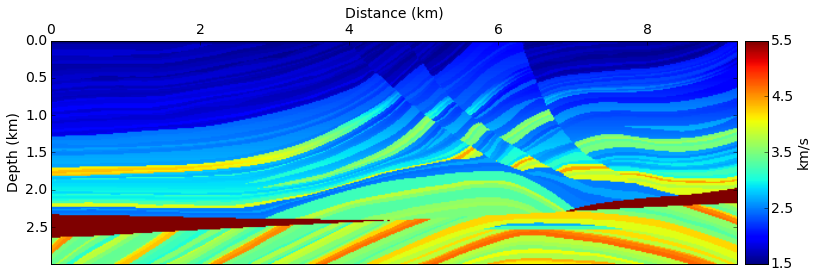

In [8]:
plot_vel(vel,h)

In [9]:
times=np.empty((nx,nx,nz),dtype=float32)

In [10]:
for isrc in range(nx):
    if isrc %10 ==0:
        print isrc,nx
    times[isrc]=traveltime(vel.astype(float64),h,isrc,0)
#times.tofile("ttime_marm_org.bin")
#times=np.fromfile("ttime_marm_org.bin",dtype=float32)
#times.shape=(nx,nx,nz)

0 576
10 576
20 576
30 576
40 576
50 576
60 576
70 576
80 576
90 576
100 576
110 576
120 576
130 576
140 576
150 576
160 576
170 576
180 576
190 576
200 576
210 576
220 576
230 576
240 576
250 576
260 576
270 576
280 576
290 576
300 576
310 576
320 576
330 576
340 576
350 576
360 576
370 576
380 576
390 576
400 576
410 576
420 576
430 576
440 576
450 576
460 576
470 576
480 576
490 576
500 576
510 576
520 576
530 576
540 576
550 576
560 576
570 576


In [11]:
image=kirchhoff(sd,h,times,0.1)
dimg=zdiff2(image)
dimg.min(),dimg.max()

0 240
10 240
20 240
30 240
40 240
50 240
60 240
70 240
80 240
90 240
100 240
110 240
120 240
130 240
140 240
150 240
160 240
170 240
180 240
190 240
200 240
210 240
220 240
230 240


(-2105900.2296740115, 2163453.6537617445)

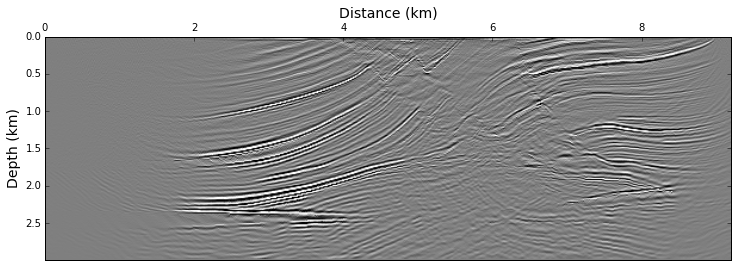

In [12]:
plot_mig(perc_clip(dimg,97),h)

# Kirchhoff prestack depth migration using a smooth velocity model

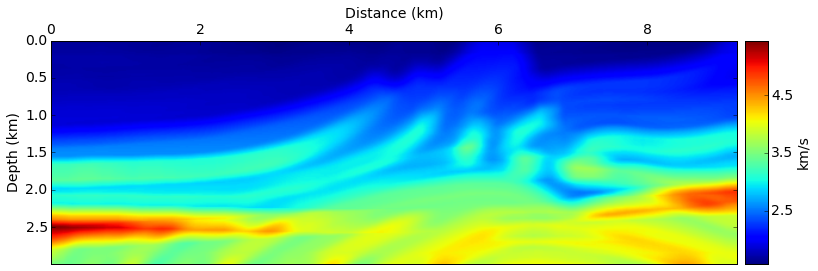

In [13]:
svel=moving_average2d(vel,10,10)
plot_vel(svel,h)

In [14]:
stimes=np.empty((nx,nx,nz),dtype=float32)
for isrc in range(nx):
    if isrc %10 ==0:
        print isrc,nx
    stimes[isrc]=traveltime(svel.astype(float64),h,isrc,0)
#stimes.tofile("ttime_marm_sm10.bin")
#stimes=np.fromfile("ttime_marm_sm10.bin",dtype=np.float32)
#stimes.shape=(nx,nx,nz)

0 576
10 576
20 576
30 576
40 576
50 576
60 576
70 576
80 576
90 576
100 576
110 576
120 576
130 576
140 576
150 576
160 576
170 576
180 576
190 576
200 576
210 576
220 576
230 576
240 576
250 576
260 576
270 576
280 576
290 576
300 576
310 576
320 576
330 576
340 576
350 576
360 576
370 576
380 576
390 576
400 576
410 576
420 576
430 576
440 576
450 576
460 576
470 576
480 576
490 576
500 576
510 576
520 576
530 576
540 576
550 576
560 576
570 576


In [15]:
simage=kirchhoff(sd,h,stimes,0.1)
dsimg=zdiff2(simage)
dsimg.min(),dsimg.max()

0 240
10 240
20 240
30 240
40 240
50 240
60 240
70 240
80 240
90 240
100 240
110 240
120 240
130 240
140 240
150 240
160 240
170 240
180 240
190 240
200 240
210 240
220 240
230 240


(-1645781.8947763741, 1576753.958869338)

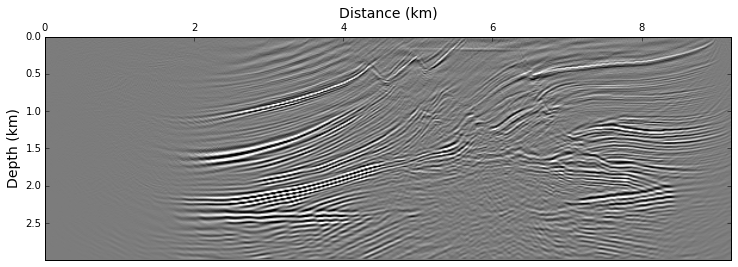

In [16]:
plot_mig(perc_clip(dsimg,97),h)